Epoch 0: Loss: 265.7744445800781
Epoch 1: Loss: 168.70428466796875
Epoch 2: Loss: 107.2529525756836
Epoch 3: Loss: 68.34271240234375
Epoch 4: Loss: 43.700294494628906
Epoch 5: Loss: 28.090791702270508
Epoch 6: Loss: 18.201141357421875
Epoch 7: Loss: 11.93415641784668
Epoch 8: Loss: 7.962050437927246
Epoch 9: Loss: 5.443982124328613
Epoch 10: Loss: 3.84737229347229
Epoch 11: Loss: 2.8348309993743896
Epoch 12: Loss: 2.1925716400146484
Epoch 13: Loss: 1.785107135772705
Epoch 14: Loss: 1.5265535116195679
Epoch 15: Loss: 1.3624593019485474
Epoch 16: Loss: 1.2582958936691284
Epoch 17: Loss: 1.192163109779358
Epoch 18: Loss: 1.1501680612564087
Epoch 19: Loss: 1.123496174812317


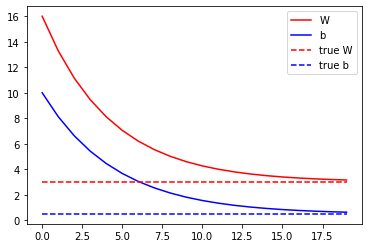

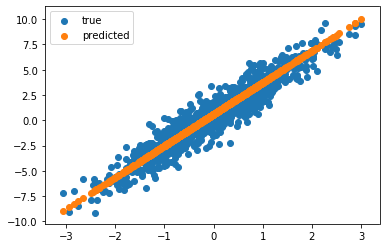

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)
    
    def __call__(self, x):
        return self.W * x + self.b

    
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))
        
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

TRUE_W = 3.0
TRUE_b = 0.5 
NUM_SAMPLE = 1000

X = tf.random.normal(shape=(NUM_SAMPLE,))
noise = tf.random.normal(shape=(NUM_SAMPLE,))
y = X * TRUE_W + TRUE_b + noise

model = Model()
Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    # eager execution allows us to do this
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    
    current_loss = loss(y, model(X))
    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")
    
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

    